This just initialises needed variables.

In [22]:
from time import time
import matplotlib.pyplot as plt
import pandas as pandas

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, MiniBatchNMF, LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups


n_samples = 2000
n_features = 1000
n_components = 10
n_top_words = 20
batch_size = 128
init = "nndsvda"

This is the fuction which is used to display the results of the different models when used on the data. it displays the categories and the most used words in a bar graph.

In [4]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()


Here we load in the data.

In [5]:
t0 = time()
data, _ = fetch_20newsgroups(
    shuffle=True,
    random_state=1,
    remove=("headers", "footers", "quotes"),
    return_X_y=True,
)
data_samples = data[:n_samples]
print("done in %0.3fs." % (time() - t0))

done in 14.272s.


the data looks like this.

In [ ]:
print(data_samples)

In [10]:
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95, min_df=2, max_features=n_features, stop_words="english"
)
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(
    max_df=0.95, min_df=2, max_features=n_features, stop_words="english"
)
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))
print(tf)


Extracting tf-idf features for NMF...
done in 0.647s.
Extracting tf features for LDA...
done in 0.599s.
  (0, 881)	1
  (0, 867)	1
  (0, 286)	1
  (0, 862)	1
  (0, 587)	4
  (0, 717)	1
  (0, 488)	2
  (0, 988)	1
  (0, 432)	1
  (0, 527)	1
  (0, 923)	1
  (0, 904)	1
  (0, 748)	1
  (0, 764)	1
  (0, 206)	1
  (0, 841)	1
  (0, 750)	1
  (0, 412)	1
  (0, 567)	1
  (0, 130)	1
  (0, 548)	1
  (0, 493)	1
  (0, 410)	1
  (0, 708)	1
  (1, 345)	1
  :	:
  (1998, 453)	2
  (1998, 209)	1
  (1998, 505)	1
  (1998, 912)	2
  (1998, 578)	1
  (1998, 288)	2
  (1998, 354)	2
  (1998, 911)	1
  (1998, 545)	1
  (1998, 968)	3
  (1998, 436)	1
  (1998, 667)	1
  (1998, 698)	1
  (1998, 970)	1
  (1998, 78)	1
  (1998, 614)	3
  (1998, 289)	2
  (1998, 790)	1
  (1998, 770)	1
  (1998, 331)	1
  (1998, 256)	1
  (1999, 286)	1
  (1999, 356)	1
  (1999, 366)	1
  (1999, 738)	1


Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=2000 and n_features=1000...
done in 0.393s.


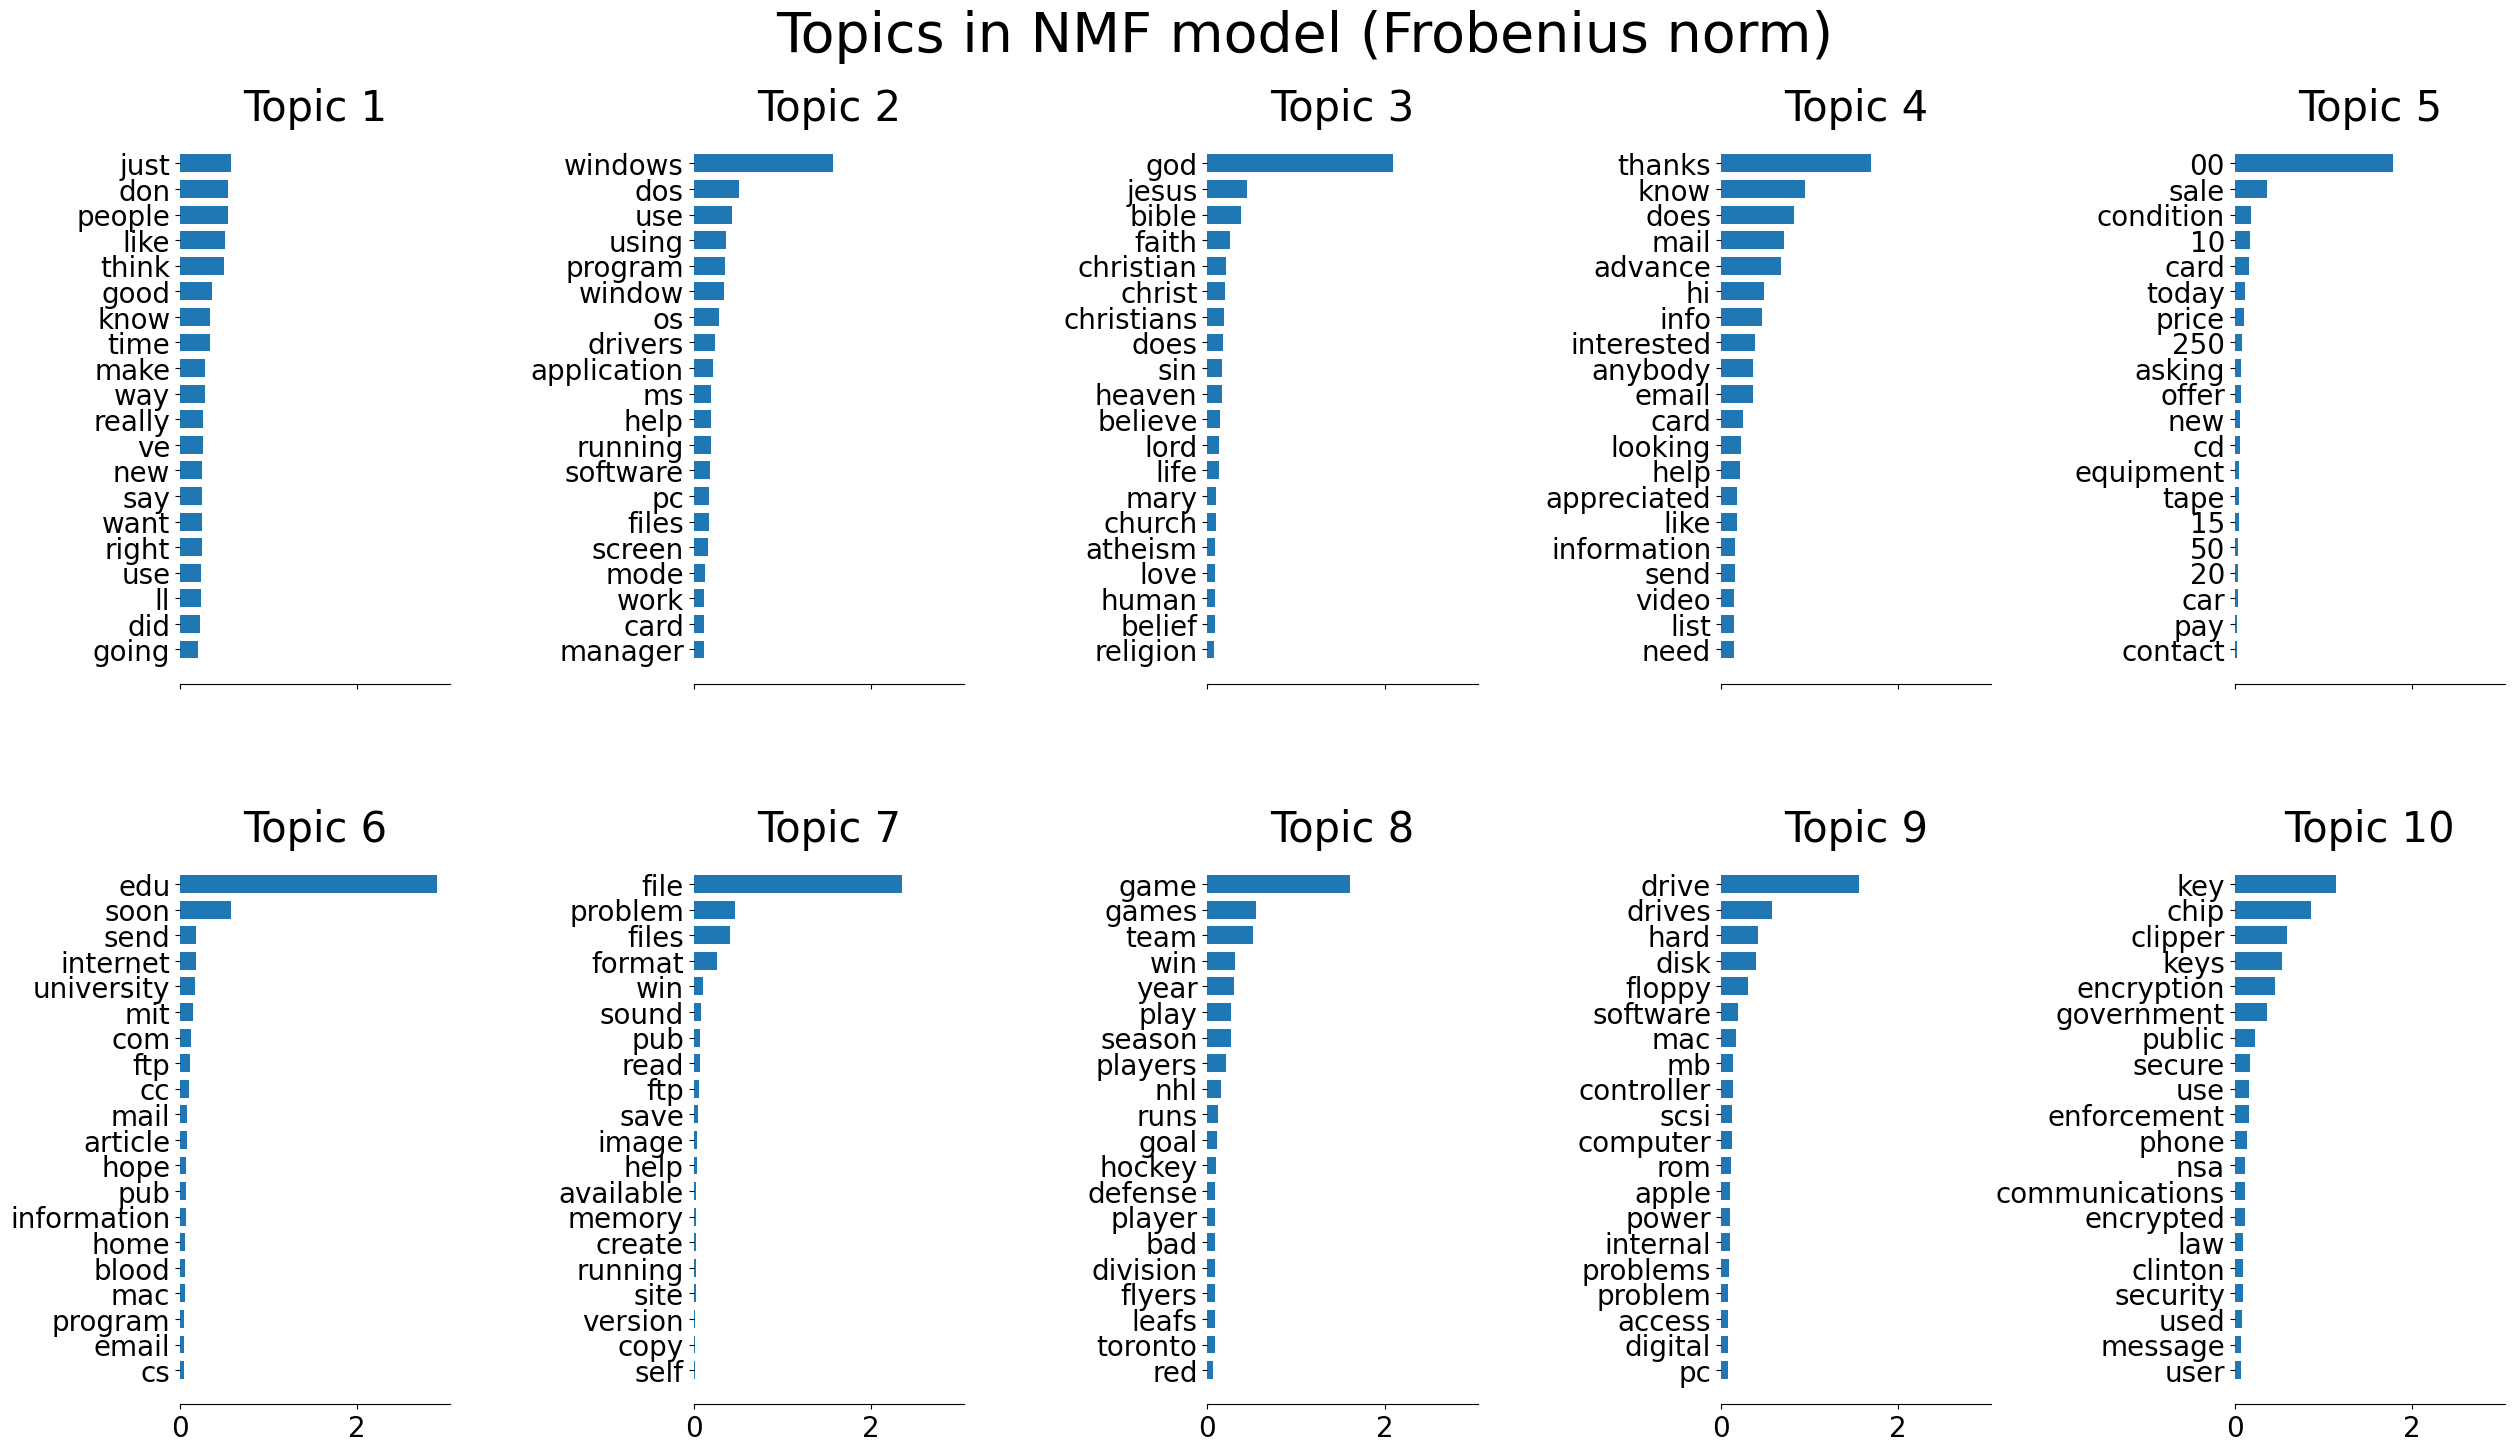

In [7]:
print(
    "Fitting the NMF model (Frobenius norm) with tf-idf features, "
    "n_samples=%d and n_features=%d..." % (n_samples, n_features)
)
t0 = time()
nmf = NMF(
    n_components=n_components,
    random_state=1,
    init=init,
    beta_loss="frobenius",
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=1,
).fit(tfidf)
print("done in %0.3fs." % (time() - t0))


tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    nmf, tfidf_feature_names, n_top_words, "Topics in NMF model (Frobenius norm)"
)




 Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=2000 and n_features=1000...
done in 2.410s.


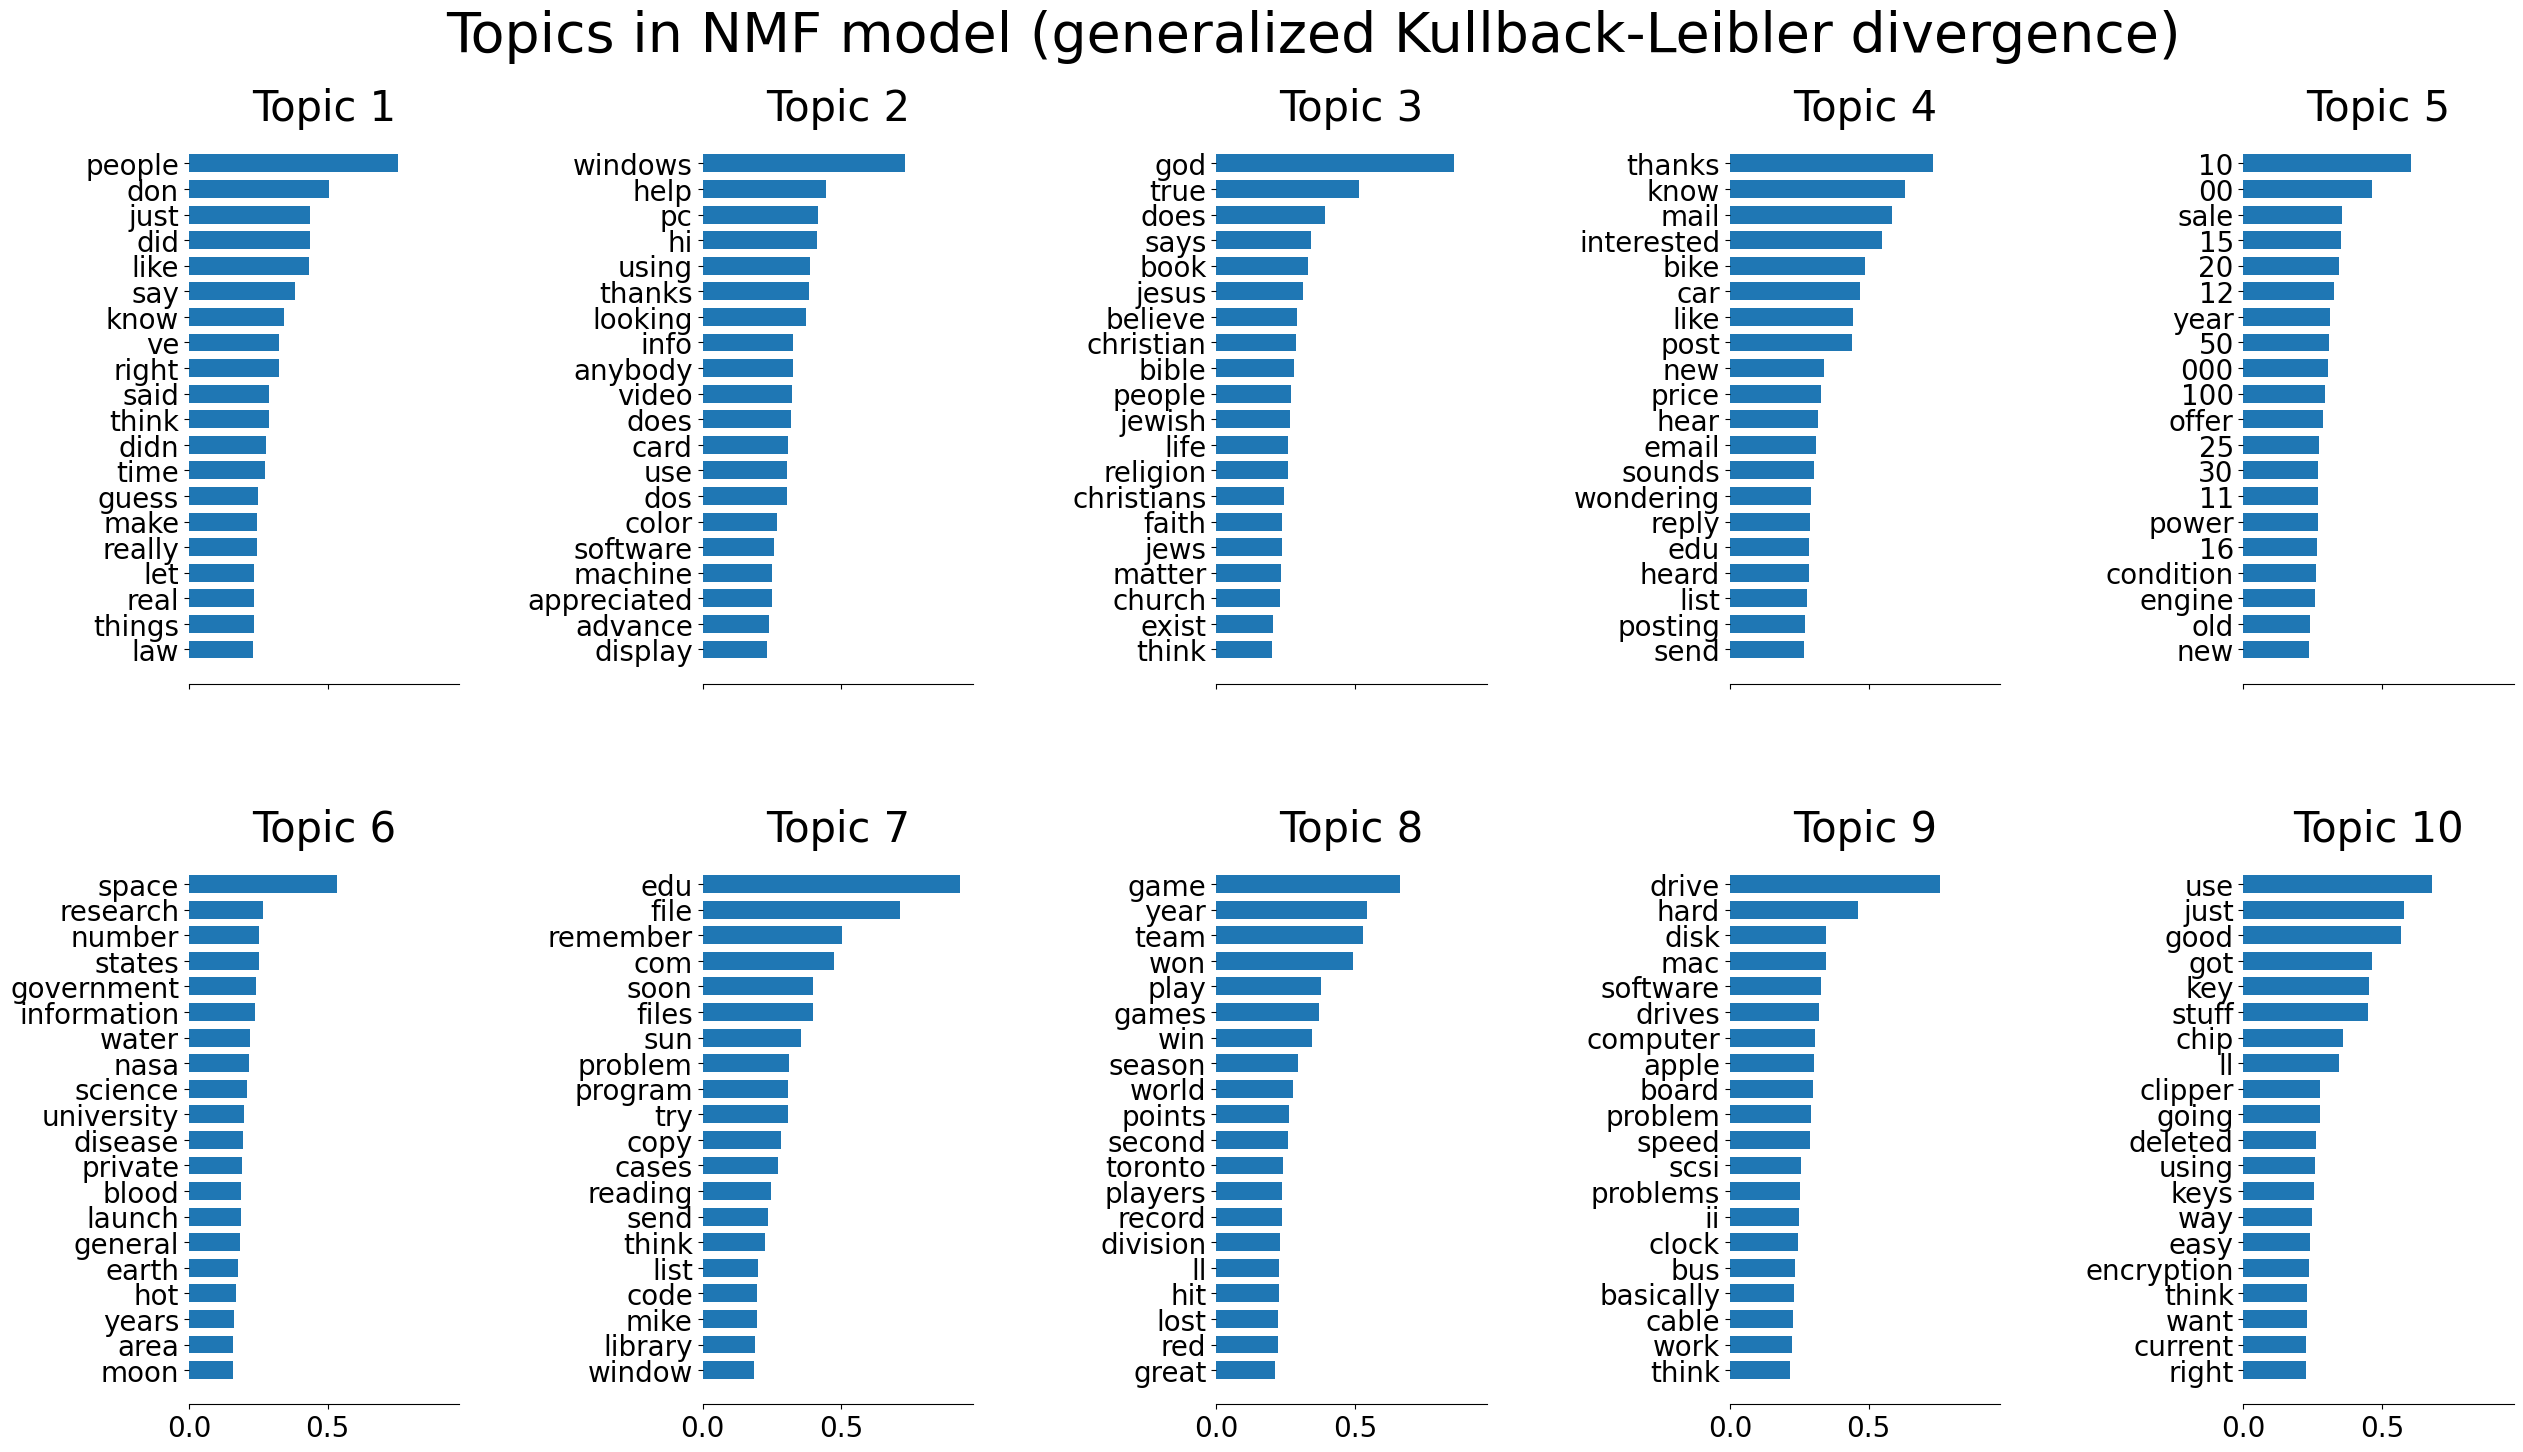

In [8]:
# Fit the NMF model
print(
    "\n" * 2,
    "Fitting the NMF model (generalized Kullback-Leibler "
    "divergence) with tf-idf features, n_samples=%d and n_features=%d..."
    % (n_samples, n_features),
)
t0 = time()
nmf = NMF(
    n_components=n_components,
    random_state=1,
    init=init,
    beta_loss="kullback-leibler",
    solver="mu",
    max_iter=1000,
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=0.5,
).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    nmf,
    tfidf_feature_names,
    n_top_words,
    "Topics in NMF model (generalized Kullback-Leibler divergence)",
)


Now i will try with a different dataset. This data is also text, but is small text each is cattegorised as a emotion. I will try to see if i can run the text through nmf and see if it will categorise the emotions.

Here i will first create a new non csv string, just containing the text part.

In [51]:
df = pandas.read_csv("Emotion_final.csv")
df.drop('Emotion', inplace=True, axis=1)
string = ""
for index, row in df.iterrows():
    string +=row["Text"]
f = open("new.txt", "w")
f.write(string)
df.head

<bound method NDFrame.head of                                                     Text
0                                i didnt feel humiliated
1      i can go from feeling so hopeless to so damned...
2       im grabbing a minute to post i feel greedy wrong
3      i am ever feeling nostalgic about the fireplac...
4                                   i am feeling grouchy
...                                                  ...
21454               Melissa stared at her friend in dism
21455  Successive state elections have seen the gover...
21456               Vincent was irritated but not dismay
21457  Kendall-Hume turned back to face the dismayed ...
21458                    I am dismayed , but not surpris

[21459 rows x 1 columns]>

In [43]:

print("Extracting tf-idf features for NMF...")
f = open("Emotion_final.csv", "r")
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95, min_df=2, max_features=n_features, stop_words="english"
)
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(f)
print("done in %0.3fs." % (time() - t0))
print(tfidf)


Extracting tf-idf features for NMF...


ValueError: Iterable over raw text documents expected, string object received.

In [38]:
df.loc[:, "Text"].to_string

<bound method Series.to_string of 0                                  i didnt feel humiliated
1        i can go from feeling so hopeless to so damned...
2         im grabbing a minute to post i feel greedy wrong
3        i am ever feeling nostalgic about the fireplac...
4                                     i am feeling grouchy
                               ...                        
21454                 Melissa stared at her friend in dism
21455    Successive state elections have seen the gover...
21456                 Vincent was irritated but not dismay
21457    Kendall-Hume turned back to face the dismayed ...
21458                      I am dismayed , but not surpris
Name: Text, Length: 21459, dtype: object>

Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=2000 and n_features=11...


/home/gustav/python/P5-Nonlinear-Dimensionality-Reduction/.env/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


done in 1.955s.


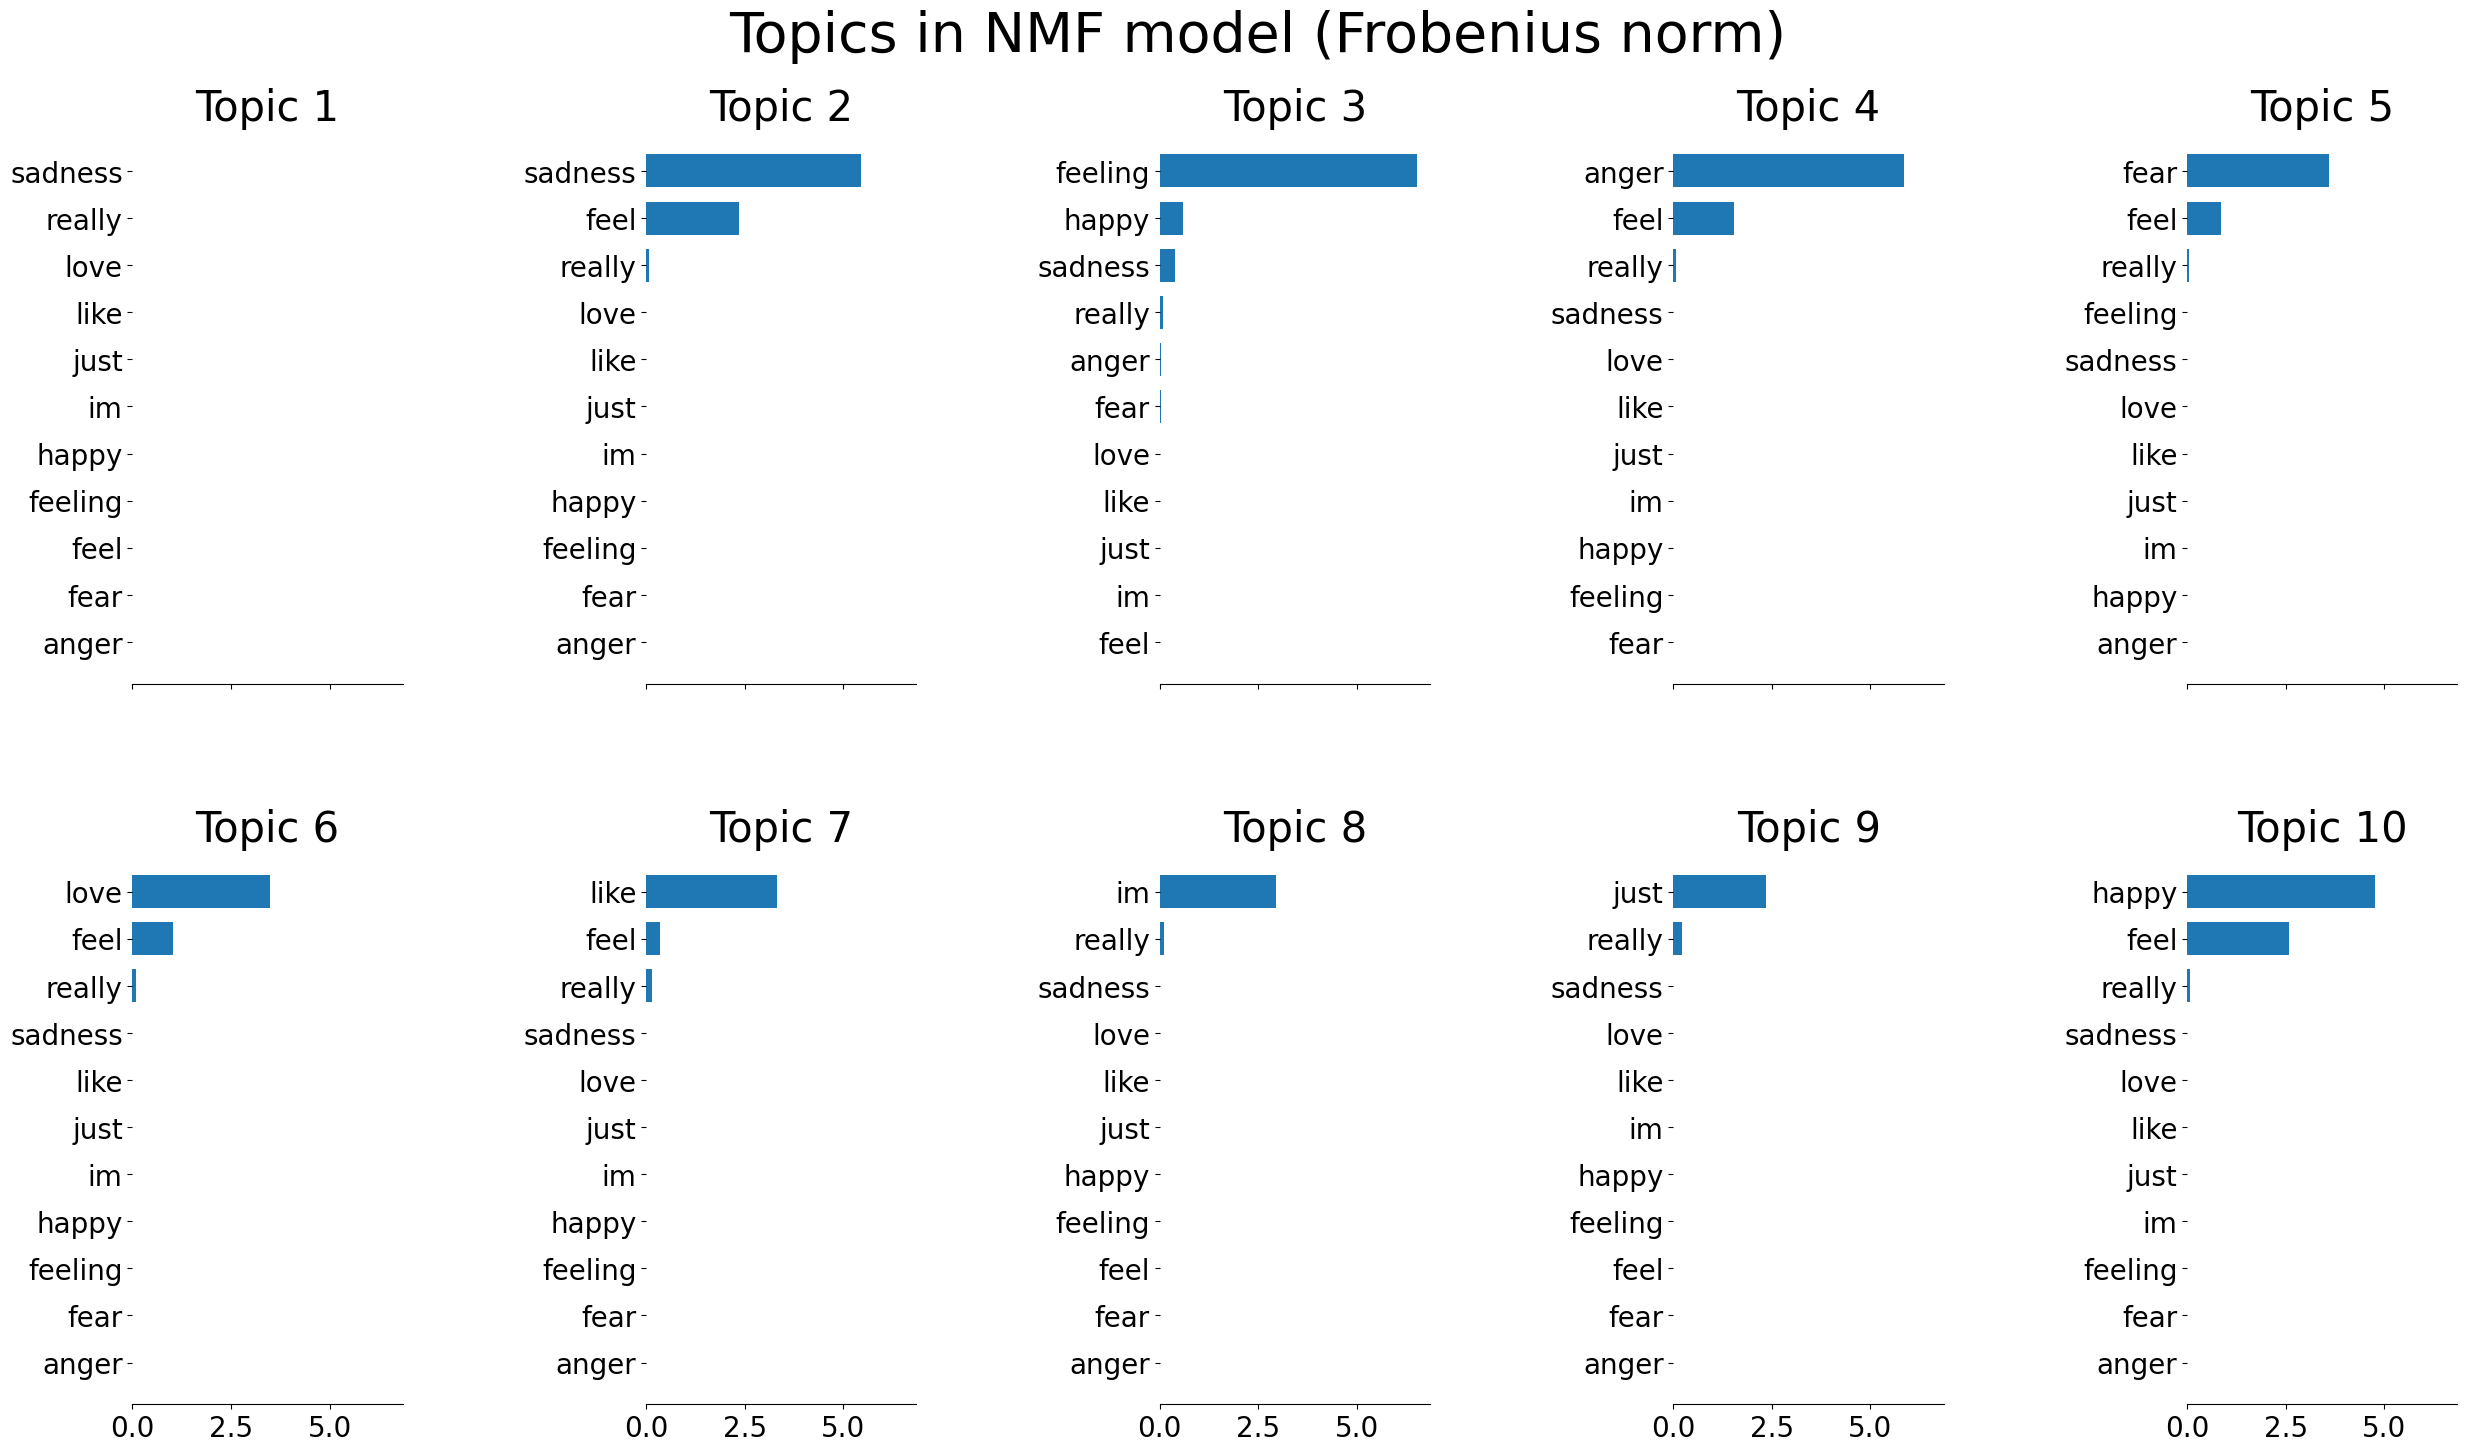

In [21]:
print(
    "Fitting the NMF model (Frobenius norm) with tf-idf features, "
    "n_samples=%d and n_features=%d..." % (n_samples, n_features)
)
t0 = time()
nmf = NMF(
    n_components=n_components,
    random_state=1,
    init=init,
    beta_loss="frobenius",
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=1,
).fit(tfidf)
print("done in %0.3fs." % (time() - t0))


tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    nmf, tfidf_feature_names, n_top_words, "Topics in NMF model (Frobenius norm)"
)